# Bayesian Linear Regression Tutorial

## The Target
Assume the target $t$ is given by some function of the inputs/parameters plus a noise term.

$$t = f(\vec{x}, \vec{w}) + \epsilon $$

Let's assume the noise is characterized by a normal distribution of mean 0 and precision $\beta$.  Therefore we can say the probability of a value $t$ is given by a normal distribution around the value of the function $f(\vec{x}, \vec{w})$ at that point:

$$p(t \mid \vec{x}, \vec{w}) = \mathcal{N}(t \mid f(\vec{x}, \vec{w}), \beta^{-1}) \tag{1}$$ 

where $\mathcal{N}(t \mid \mu, \sigma^2)$ represents a normal distribution of mean $\mu$ and variance $\sigma^2$.

Ultimately, we want to be able to predict $t$ for a new input $\vec{x}$ given some old data $D$ to base that prediction on: 

In **Bayesian approach**, we try to estimate the distribution of target, i.e. $p(t \mid \boldsymbol{x}, D)$, while in **Frequentest treatment**, we only get a point estimate of the target, $ \hat{t} $. 


### The Model
Let's assume a model for this target that's linear in the parameters $\{w_j\}$, but has a general basis representation of the inputs given by $\{\phi_j(\vec{x})\}$.  This results in the following model form:
$$f(\vec{x}, \vec{w}) = w_0 + \sum_{j=1}^{M-1} w_j\phi_j(\vec{x})$$ 
where M is the total number of model parameters.

Note that the basis functions $\phi_j(\vec{x})$ do *not* need to be linear in $\vec{x}$; the linearity required in the assumptions is in reference to the parameters $\{w_j\}$.  We could therefore have, e.g. $\phi_n(x) = sin(nx)$.

For convenience, let's define the basis function $\phi_0(\vec{x}) \equiv 1$ so that we can write the model as a vector equation: 

$$f(\vec{x}, \vec{w}) = \vec{w}^T \vec{\phi}(\vec{x})$$

where $\vec{\phi} = (\phi_0, ..., \phi_{M-1})^T$ and $\vec{w} = (w_0, ..., w_{M-1})^T$

Therefore our model of the target $t$ is given by:

$$p(t \mid \vec{x}, \vec{w}) =  \mathcal{N}(t \mid y(\vec{x}, \vec{w}), \beta^{-1}) = \mathcal{N}(t \mid \vec{w}^T \vec{\phi}(\vec{x}), \beta^{-1}) \tag{2}$$ 

and we hope, among other things, to find values for $\vec{w}$ that make a good fit to the true model, given by $(1)$.

## Frequentist approach
In frequentist viewpoint, we try to find how likely is for an output $t$ to belong to a model defined by data $\vec{\phi}(\vec{x})$, weights $\vec{w}$ and model parameters $\beta$ (if any), or maximize the likelihood $p(t \mid \vec{x}, \vec{w})$, we perform a Maximum Likelihood Estimator (MLE). Maximizing the likelihood means maximizing the probability that models the training data, given the model parameters, as:
$$\vec{w}_{MLE} = argmax_{w} \prod_{n=1}^{N} p(t_{n} \mid \vec{x}_{n}, \vec{w})$$
To simplify the computation, we perform the log-trick and place the term to optimize into a log function. We can do this because log is a monotonically-increasing function, thus applying it to any function won’t change the input values where the minimum or maximum of the solution (ie where gradient is zero). Moreover, since Gaussian distribution is represented by a product of exponentials, by applying the log function we bring the power term out of the exponential, making its computation simpler and faster. In practice, we apply the log-trick to the function we want to minimize and get:
$$ \vec{w}_{MLE} = argmin_{w} -log(\prod_{n=1}^{N} \mathcal{N}(t_{n} \mid \vec{w}^T \vec{\phi}(\vec{x_{n}}), \beta^{-1}) ) =  argmin_{w} \sum_{n=1}^{N}\frac{\beta}{2}(t_{n} - \vec{w}^T \vec{\phi}(\vec{x_{n}}))^{2}$$
$$ \vec{w}_{MLE} = (\vec{\Phi}^{T}\vec{\Phi})^{-1}\vec{\Phi}\vec{t}$$

$$ \hat{t}=\boldsymbol{w}_{MLE} \vec{\phi}(\vec{x_{new}})  $$
with 
$$ \vec{\Phi} \equiv   \begin{bmatrix}
    \phi_0(\vec{x}_1)       & \phi_1(\vec{x}_1) & \dots & \phi_{M-1}(\vec{x}_1) \\
    \phi_0(\vec{x}_2)       & \phi_1(\vec{x}_2) & \dots & \phi_{M-1}(\vec{x}_2) \\
    \vdots                  & \vdots            & \ddots & \vdots               \\
    \phi_0(\vec{x}_N)       & \phi_1(\vec{x}_N) & \dots & \phi_{M-1}(\vec{x}_N)
\end{bmatrix}
$$
if we want ot add an L2 regularizer to the likelihood function,
$$\vec{w}_{MAP} = (\vec{\Phi}^{T}\vec{\Phi}+ \lambda I)^{-1}\vec{\Phi}\vec{t}$$

$$ \hat{t}=\boldsymbol{w}_{MAP} \vec{\phi}(\vec{x_{new}})  $$
## Bayseian approach
Our Bayesian treatment will allow us to assign this **probability to each value of $t$** for a given $\vec{x}$.  Note that this is more powerful than merely assigning a single-valued estimate of $t$ like traditional Linear Regression, because the probability distribution allows us to assess our *uncertainty in our estimate*, or "model uncertainty".  If we need an estimate for $t$ we can simply choose the maximum of this probability distribution.

## Strategy
Recall our true goal is a predictive distribution for $t$ given a new $\vec{x}$ that's based on data $D$:

$$p(t \mid \vec{x}, D)$$

We can use the marginalization rule $p(x) = \int p(x, y) dy$ to integrate over our parameter values $\vec{w}$:

$$p(t \mid \vec{x}, D) = \int p(t, \vec{w} \mid \vec{x}, D) d\vec{w} $$

An application of the product rule to this integral gives:

$$p(t \mid \vec{x}, D) = \int p(t \mid \vec{x}, \vec{w})p(\vec{w} \mid D) d\vec{w} \tag{3}$$

This result is an integral of two terms:  a) our model given by $(2)$, which uses a particular set of parameter values, and b) a probability for these parameter values.  **In other words, our overall distribution considers every possible parameter value, evaluates a model that has those parameter values and then weights that answer by the probability of us having those parameter values in the first place.**  

Note that this probability distribution of parameters is conditional on the observed data.  We can now use Baye's Theorem to evaluate this conditional probability to take the observational data into account: 

$$p(\vec{w} \mid D) = \frac{p(\vec{w})p(D \mid \vec{w})}{p(D)} = \frac{p(\vec{w})\mathcal{L}(\vec{w} \mid D)}{p(D)}$$  

where $\mathcal{L}(\vec{w} \mid D) = p(D \mid \vec{w})$ is the likelihood of paramters $\vec{w}$ given observational data $D$.  Let's now use vector $\vec{t}$ to represent our data for the target $t$.

The likelihood of a given parameter vector $\vec{w}$ given independent, identically distributed points is calculated by a product of the individual probabilities, which are given by our model in $(2)$:
$$\mathcal{L}(\vec{w} \mid \vec{t}) = p(\vec{t} \mid \vec{X}, \vec{w}) = \prod_{n=1}^{N} p(t \mid \vec{x}_n, \vec{w}) = \prod_{n=1}^{N} \mathcal{N}(t_n \mid \vec{w}^T \vec{\phi}(\vec{x_n}), \beta^{-1}) \tag{4}$$
where $\vec{t}$ is a vector of $N$ target values, $\vec{X}$ is an $N \times (M-1)$ matrix of feature vectors and $\vec{x_n}$ is the feature vector for the n-th datum.

We will construct a **conjugate prior** such that when we multiply the likelihood by this prior $p(\vec{w})$, we get a function of the same form as the prior.  This will result in **simple update equations** for the parameters of the conjugate prior that convert it into the posterior distribution.  This allows us to sequentially update our estimation as new data comes in.

This strategy has the practical advantage of us not needing to calculate the normalizing denominator of Bayes' Theorem $p(D)$ since our conjugate prior will have a form that's easy to normalize.

## Example Case:  Known Noise Precision
### Theory
First, let's assume we know the precision of the gaussian noise $\beta$ from $(1)$ in advance.  In this case our conjugate prior for the weight parameters turns out to be a simple normal distribution:

$$p(\vec{w}) = \mathcal{N}(\vec{w} \mid \vec{m}_0, \vec{S}_0) \tag{5}$$

where $\vec{m}_0$ is our prior estimation for the mean value and $\vec{S}_0$ is our prior estimation of the covariance of our distribution.  The conjugate prior is a normal distribution because when you multiply the likelihood by a normal distribution, you can complete the square to get another normal distribution.  The trick is to find how the multiplication of the likelihood changes the parameters of this normal distribution.

Writing it out, the posterior distribution for our weight parameters once we observe the data is then equal to the likelihood $(4)$ multiplied by our prior $(5)$, all adjusted by some normalization constant $Z$:
$$p(\vec{w} \mid \vec{t}, \vec{X}) = \frac{1}{Z} \times p(\vec{t} \mid \vec{X}, \vec{w}) \times p(\vec{w}) = \frac{1}{Z} \prod_{n=1}^{N} \mathcal{N}(t_n \mid \vec{w}^T \vec{\phi}(\vec{x_n}), \beta^{-1}) \times \mathcal{N}(\vec{w} \mid \vec{m}_0, \vec{S}_0)$$

The normalization constant can be ignored until the end since the resulting normal distribution can have its normalization constant computed easily.  This results in a normalized form given by:
$$p(\vec{w} \mid \vec{t}) =  \mathcal{N}(\vec{w} \mid \vec{m}_N, \vec{S}_N) \tag{6.1}$$
where the parameters are updated via these equations:
$$ \vec{S}^{-1}_N = \vec{S}_0^{-1} + \beta\vec{\Phi}^T\vec{\Phi} \tag{6.2}$$
$$ \vec{m}_N = \vec{S}_N(\vec{S}_0^{-1}\vec{m}_0 + \beta\vec{\Phi}^T\vec{t}) \tag{6.3}$$

Note that if data comes in sequentially, the posterior of the previous step becomes the prior of the current step and we only need to calculate the updates to $\vec{m}_N$ and $\vec{S}_N^{-1}$.

### Practice
Let's say the true function (which will be unknown to our analysis) is given by 

$$ f(x, \vec{a}) = a_0 + a_1x + \epsilon \tag{7.1}$$ 

with noise $\epsilon$ given by

$$\epsilon = \mathcal{N}(n \mid 0, \beta^{-1}) \tag{7.2}$$


where 
$$a_0 = {-0.3} \\
a_1 = 0.5 \\
\beta = \frac{1}{0.2^2}$$

We generate observational data by sampling input $x$ from a uniform distribution $ U(x \mid -1, 1)$, generating noise $\epsilon$ by sampling from $(7.2)$, and then evaluating $(7.1)$ to get our target $t$.  This gives us our dataset $\{\vec{X}, \vec{t}\}$.


For our Bayesian analysis we'll start with a simple prior that has means of zero and assumes the precisions are isotropic and governed by a single precision parameter $\alpha$:
$$ p(\vec{w} \mid \alpha) = \mathcal{N}(\vec{w} \mid \vec{0}, \alpha^{-1}\vec{I}) \tag{8}$$

Our posterior updates $(6.2, 6.3)$ then evaluate to:
$$ \vec{S}^{-1}_N = \alpha\vec{I} + \beta\vec{\Phi}^T\vec{\Phi} \tag{9.1}$$
$$ \vec{m}_N = \beta\vec{S}_N\vec{\Phi}^T\vec{t} \tag{9.2}$$

Recall that in this case, we're assuming that the noise precision of $\beta$ is known to us.

In sum, we'll be using the data to estimate a probability distribution for the values of $\{w_0, w_1\}$, which is the second term under the integral in $(3)$.  If everything is correct, our probability distribution should converge to values very close to $\{a_0, a_1\}$ even though our prior is starting out centered at $\{0, 0\}$.  

Once we calculate this probability distribution we can plug it into $(3)$ along with our model and integrate to get our ultimate goal:  an equation that predicts the probability of various values of $t$ for a given $x$ based on historical data.

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

from SSY316.preprocess import GaussianFeature, PolynomialFeature, SigmoidalFeature
from SSY316.linear import (
    BayesianRegression,
    EmpiricalBayesRegression,
    LinearRegression,
    RidgeRegression
)

from sklearn.preprocessing import PolynomialFeatures

np.random.seed(1234)

Generating a toy data. This function just adds a Gaussian noise to a desired function.

In [2]:
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

##  Linear Basis Function Models
Geberating different basis function

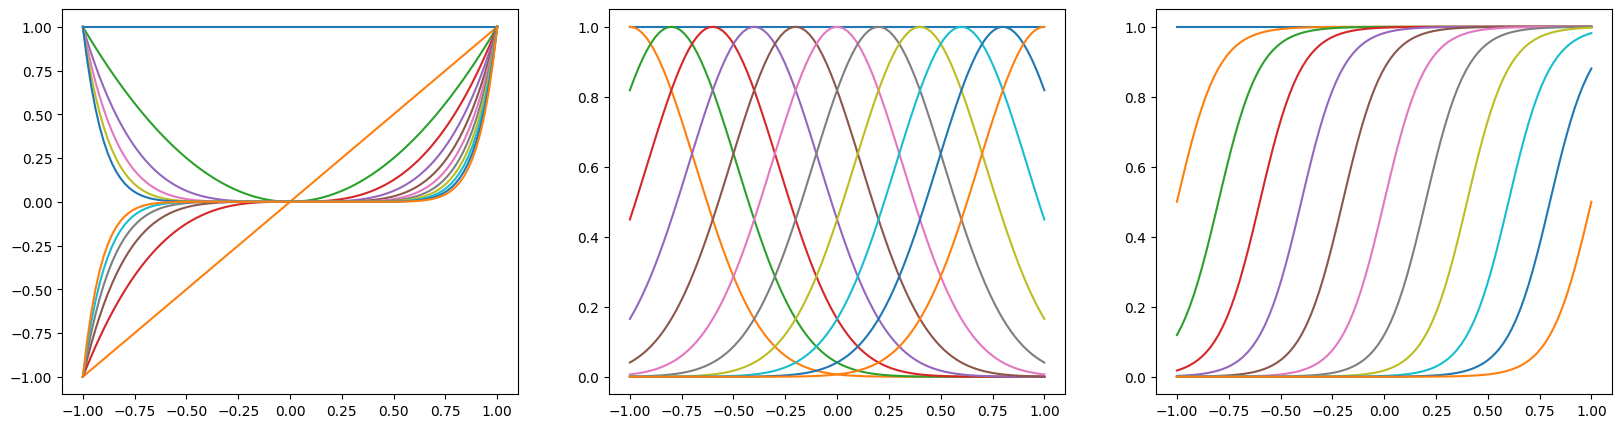

In [3]:
x = np.linspace(-1, 1, 100)
X_polynomial = PolynomialFeature(11).transform(x[:, None])
X_gaussian = GaussianFeature(np.linspace(-1, 1, 11), 0.1).transform(x)
X_sigmoidal = SigmoidalFeature(np.linspace(-1, 1, 11), 10).transform(x)

plt.figure(figsize=(20, 5))
for i, X in enumerate([X_polynomial, X_gaussian, X_sigmoidal]):
    plt.subplot(1, 3, i + 1)
    for j in range(12):
        plt.plot(x, X[:, j])

## Maximum likelihood and least squares
Applying least square estimation for linear regression problem

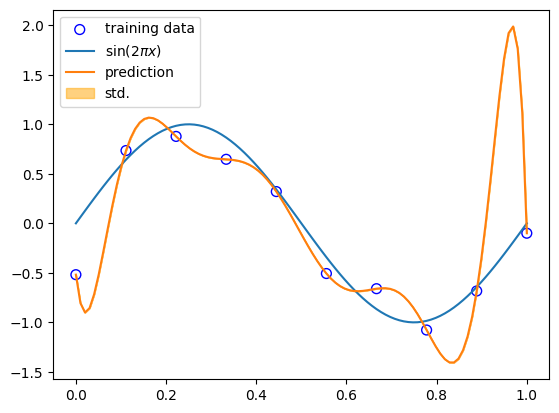

In [4]:
def sinusoidal(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = sinusoidal(x_test)

# Pick one of the three features below
feature = PolynomialFeature(10)
# feature = GaussianFeature(np.linspace(0, 1, 3), 0.1)
# feature = SigmoidalFeature(np.linspace(0, 1, 3), 10)

x_train_poly = feature.transform(x_train)
x_test_poly = feature.transform(x_test)

model = LinearRegression()
model.fit(x_train_poly, y_train)
y, y_std = model.predict(x_test_poly, return_std=True)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
plt.plot(x_test, y, label="prediction")
plt.fill_between(
    x_test, y - y_std, y + y_std,
    color="orange", alpha=0.5, label="std.")
plt.legend()
plt.show()

Try to regenerate results without using the LinearRegression() class:

## Regularized least squares
Applying least square estimation for linear regression problem

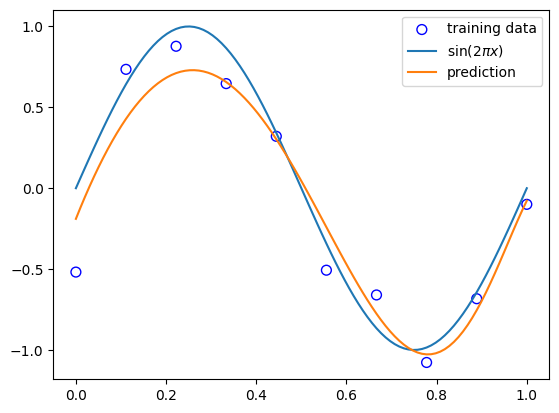

In [5]:
model = RidgeRegression(alpha=1e-3)
model.fit(x_train_poly, y_train)
y = model.predict(x_test_poly)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
plt.plot(x_test, y, label="prediction")
plt.legend()
plt.show()

Try to regenerate results without using the RidgeRegression() class. Assume $\lambda = 10^{-3}$

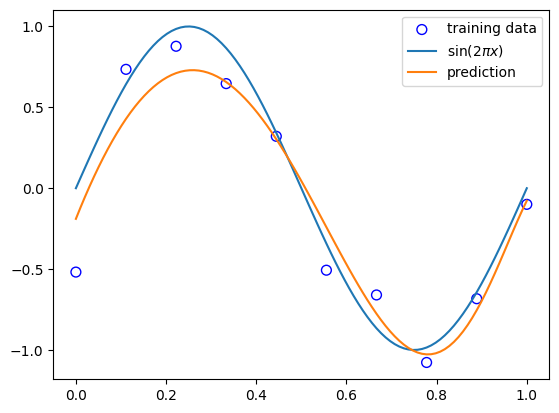

In [6]:
lam = 1e-3
eye = np.eye(np.size(x_train_poly, 1))
w = np.linalg.solve(
lam * eye + x_train_poly.T @ x_train_poly,
x_train_poly.T @ y_train,
        )
t = np.matmul(x_test_poly, w)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
plt.plot(x_test, t, label="prediction")
plt.legend()
plt.show()

##  Bayesian Linear Regression

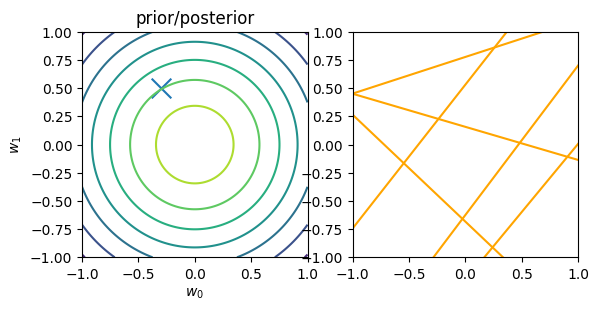

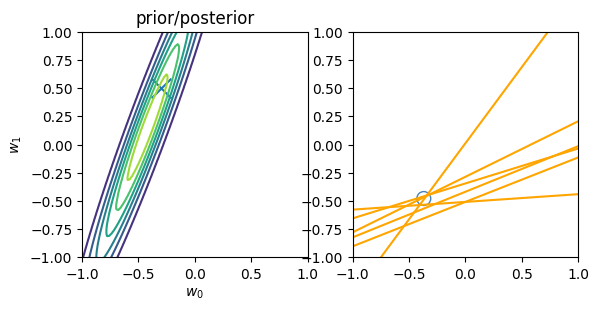

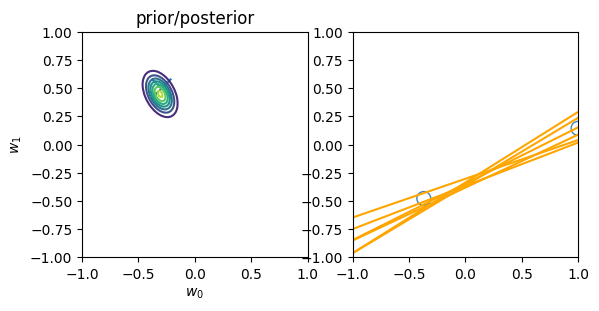

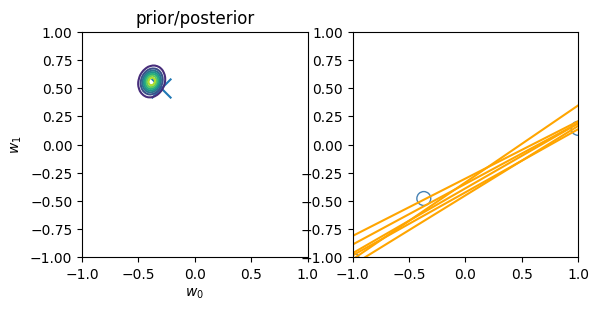

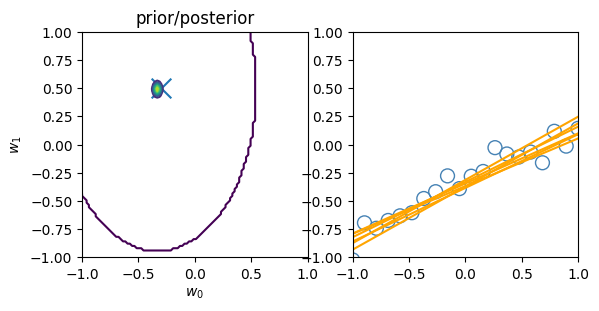

In [7]:
def linear(x):
    return -0.3 + 0.5 * x


x_train, y_train = create_toy_data(linear, 20, 0.1, [-1, 1])
x = np.linspace(-1, 1, 100)
w0, w1 = np.meshgrid(
    np.linspace(-1, 1, 100),
    np.linspace(-1, 1, 100))
w = np.array([w0, w1]).transpose(1, 2, 0)

feature = PolynomialFeature(degree=1)
x_train_poly = feature.transform(x_train)
x_poly = feature.transform(x)
model = BayesianRegression(alpha=1., beta=100.)

for begin, end in [[0, 0], [0, 1], [1, 2], [2, 3], [3, 20]]:
    model.fit(x_train_poly[begin: end], y_train[begin: end])
    plt.subplot(1, 2, 1)
    plt.scatter(-0.3, 0.5, s=200, marker="x")
    plt.contour(w0, w1, multivariate_normal.pdf(w, mean=model.w_mean, cov=model.w_cov))
    plt.gca().set_aspect('equal')
    plt.xlabel("$w_0$")
    plt.ylabel("$w_1$")
    plt.title("prior/posterior")

    plt.subplot(1, 2, 2)
    plt.scatter(x_train[:end], y_train[:end], s=100, facecolor="none", edgecolor="steelblue", lw=1)
    plt.plot(x, model.predict(x_poly, sample_size=6), c="orange")
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

Try to regenerate posterior mean without using the BayesianRegression() class and compare it to the mean generated with this class.
Use the simple prior that has means of zero and assumes the precisions are isotropic and governed by a single precision parameter $\alpha$:
$$ p(\vec{w} \mid \alpha) = \mathcal{N}(\vec{w} \mid \vec{0}, \alpha^{-1}\vec{I}) \tag{8}$$
$$\alpha=1$$
$$\beta=100$$

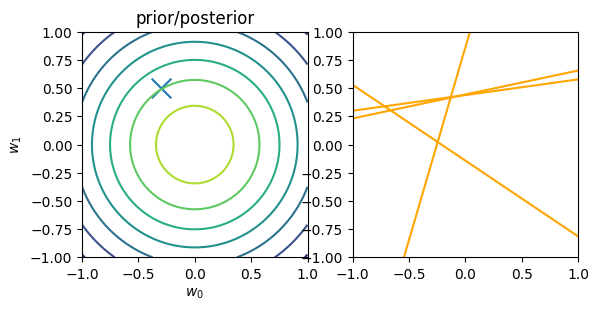

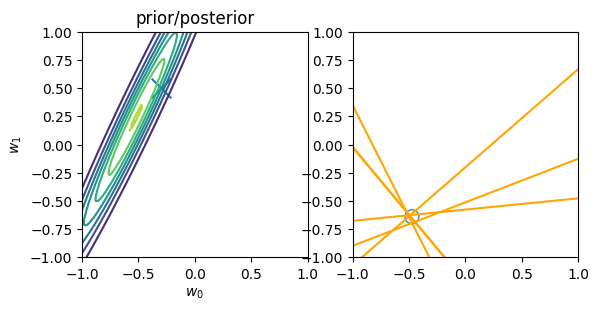

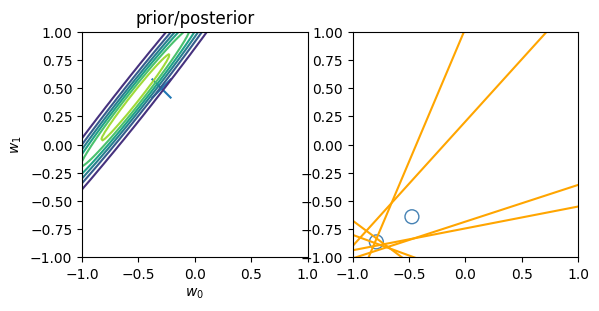

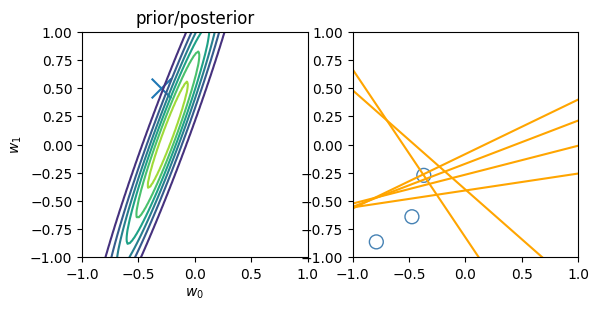

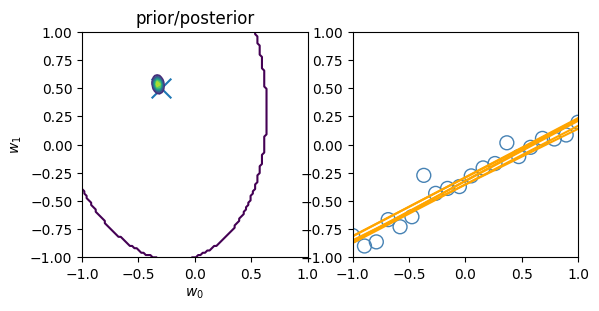

In [8]:
def linear(x):
    return -0.3 + 0.5 * x


x_train, y_train = create_toy_data(linear, 20, 0.1, [-1, 1])
x = np.linspace(-1, 1, 100)
w0, w1 = np.meshgrid(
    np.linspace(-1, 1, 100),
    np.linspace(-1, 1, 100))
w = np.array([w0, w1]).transpose(1, 2, 0)

poly = PolynomialFeatures(1)
x_train_poly = poly.fit_transform(x_train.reshape((-1,1)))
x_poly = poly.fit_transform(x.reshape((-1,1)))

alpha=1
beta=100

for begin, end in [[0, 0], [0, 1], [1, 2], [2, 3], [3, 20]]:
    
    mean_prev = np.zeros(np.size(x_train_poly[begin: end], 1))
    precision_prev = alpha * np.eye(np.size(x_train_poly[begin: end], 1))
    
    w_precision = precision_prev + beta * x_train_poly[begin: end].T @ x_train_poly[begin: end]
    
    w_mean = np.linalg.solve(
        w_precision,
        precision_prev @ mean_prev + beta * x_train_poly[begin: end].T @ y_train[begin: end],
    )
    
    w_cov = np.linalg.inv(w_precision)
    
    sample_size=6
    w_sample = np.random.multivariate_normal(
            w_mean, w_cov, size=sample_size,
    )
    y_sample = x_poly @ w_sample.T
    
    
    
    plt.subplot(1, 2, 1)
    plt.scatter(-0.3, 0.5, s=200, marker="x")
    plt.contour(w0, w1, multivariate_normal.pdf(w, mean=w_mean, cov=w_cov))
    plt.gca().set_aspect('equal')
    plt.xlabel("$w_0$")
    plt.ylabel("$w_1$")
    plt.title("prior/posterior")

    plt.subplot(1, 2, 2)
    plt.scatter(x_train[:end], y_train[:end], s=100, facecolor="none", edgecolor="steelblue", lw=1)
    plt.plot(x, y_sample, c="orange")
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

## Predictive distribution

Now, try to regenerate figures that you have seen in the lecture for predictive distribution with Gaussian basis function (page 45 in the lecture).
$$ t|x \sim \mathcal{N}(sin(2\pi x), \beta^{-1}) $$
$$\mu({x}, {w}) = {w}^T {\phi}({x})$$
$$\alpha = 10^{-3}, \beta = 2$$



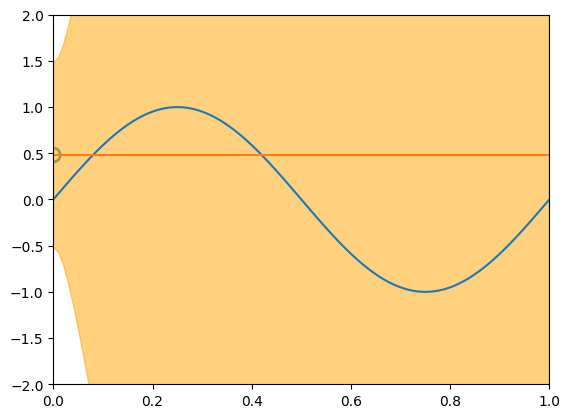

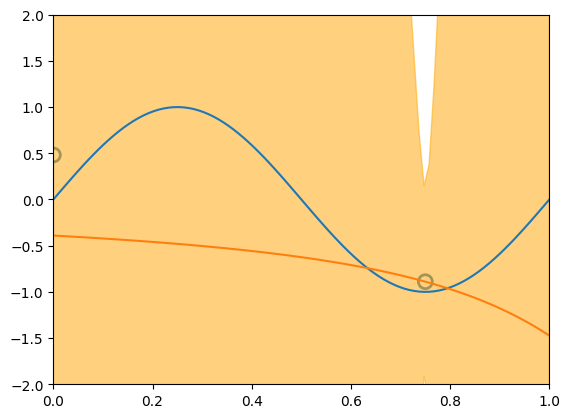

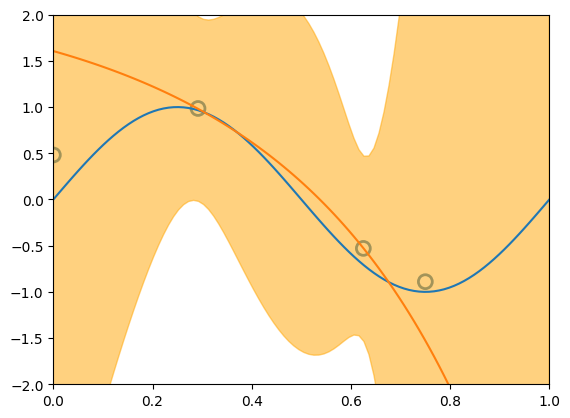

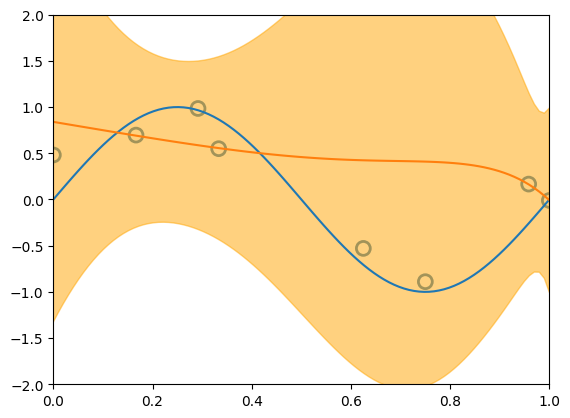

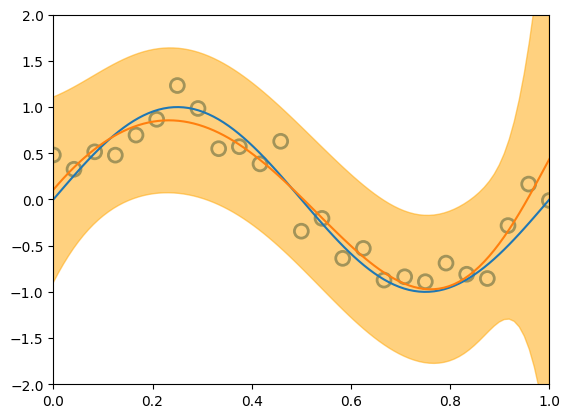

In [9]:
x_train, y_train = create_toy_data(sinusoidal, 25, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = sinusoidal(x_test)

poly = PolynomialFeatures(9)
x_train_poly = poly.fit_transform(x_train.reshape((-1,1)))
x_test_poly = poly.transform(x_test.reshape((-1,1)))

alpha=1e-3
beta=2

for begin, end in [[0, 1], [1, 2], [2, 4], [4, 8], [8, 25]]:
    mean_prev = np.zeros(np.size(x_train_poly[begin: end], 1))
    precision_prev = alpha * np.eye(np.size(x_train_poly[begin: end], 1))
    w_precision = precision_prev + beta * x_train_poly[begin: end].T @ x_train_poly[begin: end]
    w_mean = np.linalg.solve(
        w_precision,
        precision_prev @ mean_prev + beta * x_train_poly[begin: end].T @ y_train[begin: end],
    )
    w_cov = np.linalg.inv(w_precision)
    
    y = x_test_poly @ w_mean.T
    
    y_var = 1/beta + np.sum(x_test_poly @ w_cov * x_test_poly, axis=1)
    y_std = np.sqrt(y_var)
    
    plt.scatter(x_train[:end], y_train[:end], s=100, facecolor="none", edgecolor="steelblue", lw=2)
    plt.plot(x_test, y_test)
    plt.plot(x_test, y)
    plt.fill_between(x_test, y - y_std, y + y_std, color="orange", alpha=0.5)
    plt.xlim(0, 1)
    plt.ylim(-2, 2)
    plt.show()